In [165]:
import pandas as pd
import os

def load_data(path="datasets/iris.csv"):
    csv_path = os.path.join(path)
    return pd.read_csv(csv_path)
def hits_feature(df):
    df.hist(bins=100, figsize=(25,15))
    import pandas as pd

def write_dataframe_to_csv(df, filename, index=False):
    """
    将 DataFrame 写入 CSV 文件。

    参数:
    df (pandas.DataFrame): 要写入文件的 DataFrame。
    filename (str): 输出 CSV 文件的文件名。
    index (bool): 是否将索引写入到 CSV 文件中，默认为 True。
    """
    try:
        # 将 DataFrame 写入 CSV 文件
        df.to_csv(filename, index=index)
        print(f"DataFrame 已成功写入到 {filename}")
    except Exception as e:
        print(f"写入文件时出错: {e}")



In [166]:
df = load_data(path="../datasets/HW1.csv")
df.head()

,date,A1 (%),A2 (%),A3,A4,A5,A6,A7,A8,A9,...,A14,A15,A16,A17,A18,A19,A20,A21,A22 (%),A23 (%)
0,2017/3/10 01:00,"55,2","16,98","3019,53","557,434","395,713","100,664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017/3/10 01:00,"55,2","16,98","3024,41","563,965","397,383","100,672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017/3/10 01:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017/3/10 01:00,"55,2","16,98","3047,36","568,665","397,939","100,689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017/3/10 01:00,"55,2","16,98","3033,69","558,167","400,254","100,697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [167]:
df.info() # no null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     737453 non-null  object
 1   A1 (%)   737453 non-null  object
 2   A2 (%)   737453 non-null  object
 3   A3       737453 non-null  object
 4   A4       737453 non-null  object
 5   A5       737453 non-null  object
 6   A6       737453 non-null  object
 7   A7       737453 non-null  object
 8   A8       737453 non-null  object
 9   A9       737453 non-null  object
 10  A10      737453 non-null  object
 11  A11      737453 non-null  object
 12  A12      737453 non-null  object
 13  A13      737453 non-null  object
 14  A14      737453 non-null  object
 15  A15      737453 non-null  object
 16  A16      737453 non-null  object
 17  A17      737453 non-null  object
 18  A18      737453 non-null  object
 19  A19      737453 non-null  object
 20  A20      737453 non-null  object
 21  A21      7

## 轉成人看的

In [168]:
import pandas as pd
#testing =  df.head(10)
#testing.dtypes

columns_list = ['A1 (%)', 'A2 (%)', 'A22 (%)', 'A23 (%)'] # %data
no_need_tf = ['date']
for column in columns_list:
    df[column] = df[column].astype(str).str.replace(',', '.') #need .str 不然有bug
    df[column] = pd.to_numeric(df[column], errors='coerce') # 有"."為 float 如果有兩個.則NaN
   
    
columns_to_modify = df.columns.difference(columns_list + no_need_tf)

# 對這些列進行逗號的移除操作
for column in columns_to_modify:
    df[column] = df[column].str.replace(',', '')
    df[column] = pd.to_numeric(df[column], errors='coerce')  # 使用 'coerce' 以處理任何轉換錯誤

df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)
df.head()

date       datetime64[ns]
A1 (%)            float64
A2 (%)            float64
A3                  int64
A4                  int64
A5                  int64
A6                  int64
A7                  int64
A8                  int64
A9                  int64
A10                 int64
A11                 int64
A12                 int64
A13                 int64
A14                 int64
A15                 int64
A16                 int64
A17                 int64
A18                 int64
A19                 int64
A20                 int64
A21                 int64
A22 (%)           float64
A23 (%)           float64
dtype: object


,date,A1 (%),A2 (%),A3,A4,A5,A6,A7,A8,A9,...,A14,A15,A16,A17,A18,A19,A20,A21,A22 (%),A23 (%)
0,2017-03-10 01:00:00,55.2,16.98,301953,557434,395713,100664,174,249214,253235,...,250884,457396,432962,424954,443558,502255,44637,523344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,302441,563965,397383,100672,174,249719,250532,...,248994,451891,42956,432939,448086,496363,445922,498075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,304346,568054,399668,10068,174,249741,247874,...,248071,45124,468927,43461,449688,484411,447826,458567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,304736,568665,397939,100689,174,249917,254487,...,251147,452441,458165,442865,44621,471411,43769,427669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,303369,558167,400254,100697,174,250203,252136,...,248928,452441,4529,450523,45367,462598,443682,425679,66.91,1.31


In [169]:
print(df.info()) # null in A22, A23
df[df.isnull().any(axis=1)].head() #10615 ->47,047,513,812

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     737453 non-null  datetime64[ns]
 1   A1 (%)   737453 non-null  float64       
 2   A2 (%)   737453 non-null  float64       
 3   A3       737453 non-null  int64         
 4   A4       737453 non-null  int64         
 5   A5       737453 non-null  int64         
 6   A6       737453 non-null  int64         
 7   A7       737453 non-null  int64         
 8   A8       737453 non-null  int64         
 9   A9       737453 non-null  int64         
 10  A10      737453 non-null  int64         
 11  A11      737453 non-null  int64         
 12  A12      737453 non-null  int64         
 13  A13      737453 non-null  int64         
 14  A14      737453 non-null  int64         
 15  A15      737453 non-null  int64         
 16  A16      737453 non-null  int64         
 17  A17      7

,date,A1 (%),A2 (%),A3,A4,A5,A6,A7,A8,A9,...,A14,A15,A16,A17,A18,A19,A20,A21,A22 (%),A23 (%)
10614,2017-03-12 12:00:00,58.82,11.46,349873,304626,3995731707317,986998,174995,252004,255817,...,249412,54836,823946,551365,506268,429362,548271,558521,NaN,NaN
10615,2017-03-12 12:00:00,58.82,11.46,35168,305847,3996711365854,986916,174891,251554,252158,...,249939,506794,8110915,57084,489573,413805,564624,582845,NaN,NaN
10616,2017-03-12 12:00:00,58.82,11.46,361533,307068,399769102439,986833,174788,250928,242699,...,251851,50259,798237,57076,449398,406453,567284,598766,NaN,NaN
10617,2017-03-12 12:00:00,58.82,11.46,365488,308105,3998670682927,986751,174684,250906,253246,...,248522,492856,81274,569068,489332,407251,585736,631013,NaN,NaN
10618,2017-03-12 12:00:00,58.82,11.46,366523,305786,3999650341463,986669,174581,250455,25129,...,248785,45049,821967,562537,478186,431754,552528,604669,NaN,NaN


In [170]:
df.describe()

,date,A1 (%),A2 (%),A3,A4,A5,A6,A7,A8,A9,...,A14,A15,A16,A17,A18,A19,A20,A21,A22 (%),A23 (%)
count,737453,737453.000000,737453.000000,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,...,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,698777.000000,681720.000000
mean,2017-06-16 03:27:22.656549376,56.294739,14.651716,1.339406e+12,2.161316e+11,6.245448e+11,1.909239e+09,1.403892e+09,3.549008e+10,4.402292e+10,...,2.475333e+10,4.358469e+11,5.218964e+11,6.399874e+11,2.280960e+11,2.101705e+11,2.204856e+11,1.990718e+11,65.140699,2.190057
min,2017-03-10 01:00:00,42.740000,1.310000,1.100000e+02,2.490000e+02,3.770000e+02,1.000000e+01,1.600000e+01,1.990000e+02,1.940000e+02,...,2.400000e+02,1.630000e+02,2.260000e+02,1.300000e+02,1.750000e+02,2.510000e+02,1.650000e+02,2.350000e+02,62.050000,0.600000
25%,2017-05-04 23:00:00,52.670000,8.940000,2.393270e+05,4.272620e+05,3.952740e+05,1.020920e+05,1.650170e+05,2.500530e+05,2.492920e+05,...,2.505780e+05,4.043530e+05,4.265630e+05,4.015530e+05,3.470960e+05,3.486930e+05,3.463910e+05,3.462670e+05,64.530000,1.410000
50%,2017-06-16 15:00:00,56.080000,13.850000,3.403510e+05,5.090330e+05,4.002460e+05,9.433350e+05,1.703170e+05,2.992670e+05,2.953130e+05,...,2.985280e+05,4.799190e+05,4.919270e+05,4.804950e+05,4.053970e+05,4.006120e+05,4.080160e+05,4.025630e+05,65.260000,1.900000
75%,2017-07-29 07:00:00,59.720000,19.600000,4.352380e+05,5.631490e+05,4.061070e+05,9.756950e+05,1.739940e+05,3.001460e+05,3.006830e+05,...,3.016210e+05,5.919140e+05,5.971840e+05,6.005830e+05,4.861880e+05,4.787370e+05,4.895760e+05,4.737560e+05,65.900000,2.660000
max,2017-09-09 23:00:00,65.780000,33.400000,6.295131e+13,7.394000e+12,4.186254e+12,1.080805e+11,1.853239e+10,3.724426e+12,3.690073e+12,...,3.699183e+12,8.622205e+12,8.284389e+12,8.868202e+12,6.800200e+12,6.755715e+12,6.986233e+12,6.596583e+12,68.010000,5.530000
std,NaN,5.157744,6.807439,4.951147e+12,8.669256e+11,1.438920e+12,1.304149e+10,4.430002e+09,2.617307e+11,2.955984e+11,...,2.640849e+11,1.795397e+12,1.871729e+12,2.210399e+12,1.090460e+12,1.099108e+12,1.109635e+12,1.025817e+12,1.061070,1.034333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   A1 (%)   737453 non-null  float64
 1   A2 (%)   737453 non-null  float64
 2   A3       737453 non-null  int64  
 3   A4       737453 non-null  int64  
 4   A5       737453 non-null  int64  
 5   A6       737453 non-null  int64  
 6   A7       737453 non-null  int64  
 7   A8       737453 non-null  int64  
 8   A9       737453 non-null  int64  
 9   A10      737453 non-null  int64  
 10  A11      737453 non-null  int64  
 11  A12      737453 non-null  int64  
 12  A13      737453 non-null  int64  
 13  A14      737453 non-null  int64  
 14  A15      737453 non-null  int64  
 15  A16      737453 non-null  int64  
 16  A17      737453 non-null  int64  
 17  A18      737453 non-null  int64  
 18  A19      737453 non-null  int64  
 19  A20      737453 non-null  int64  
 20  A21      737453 non-null  

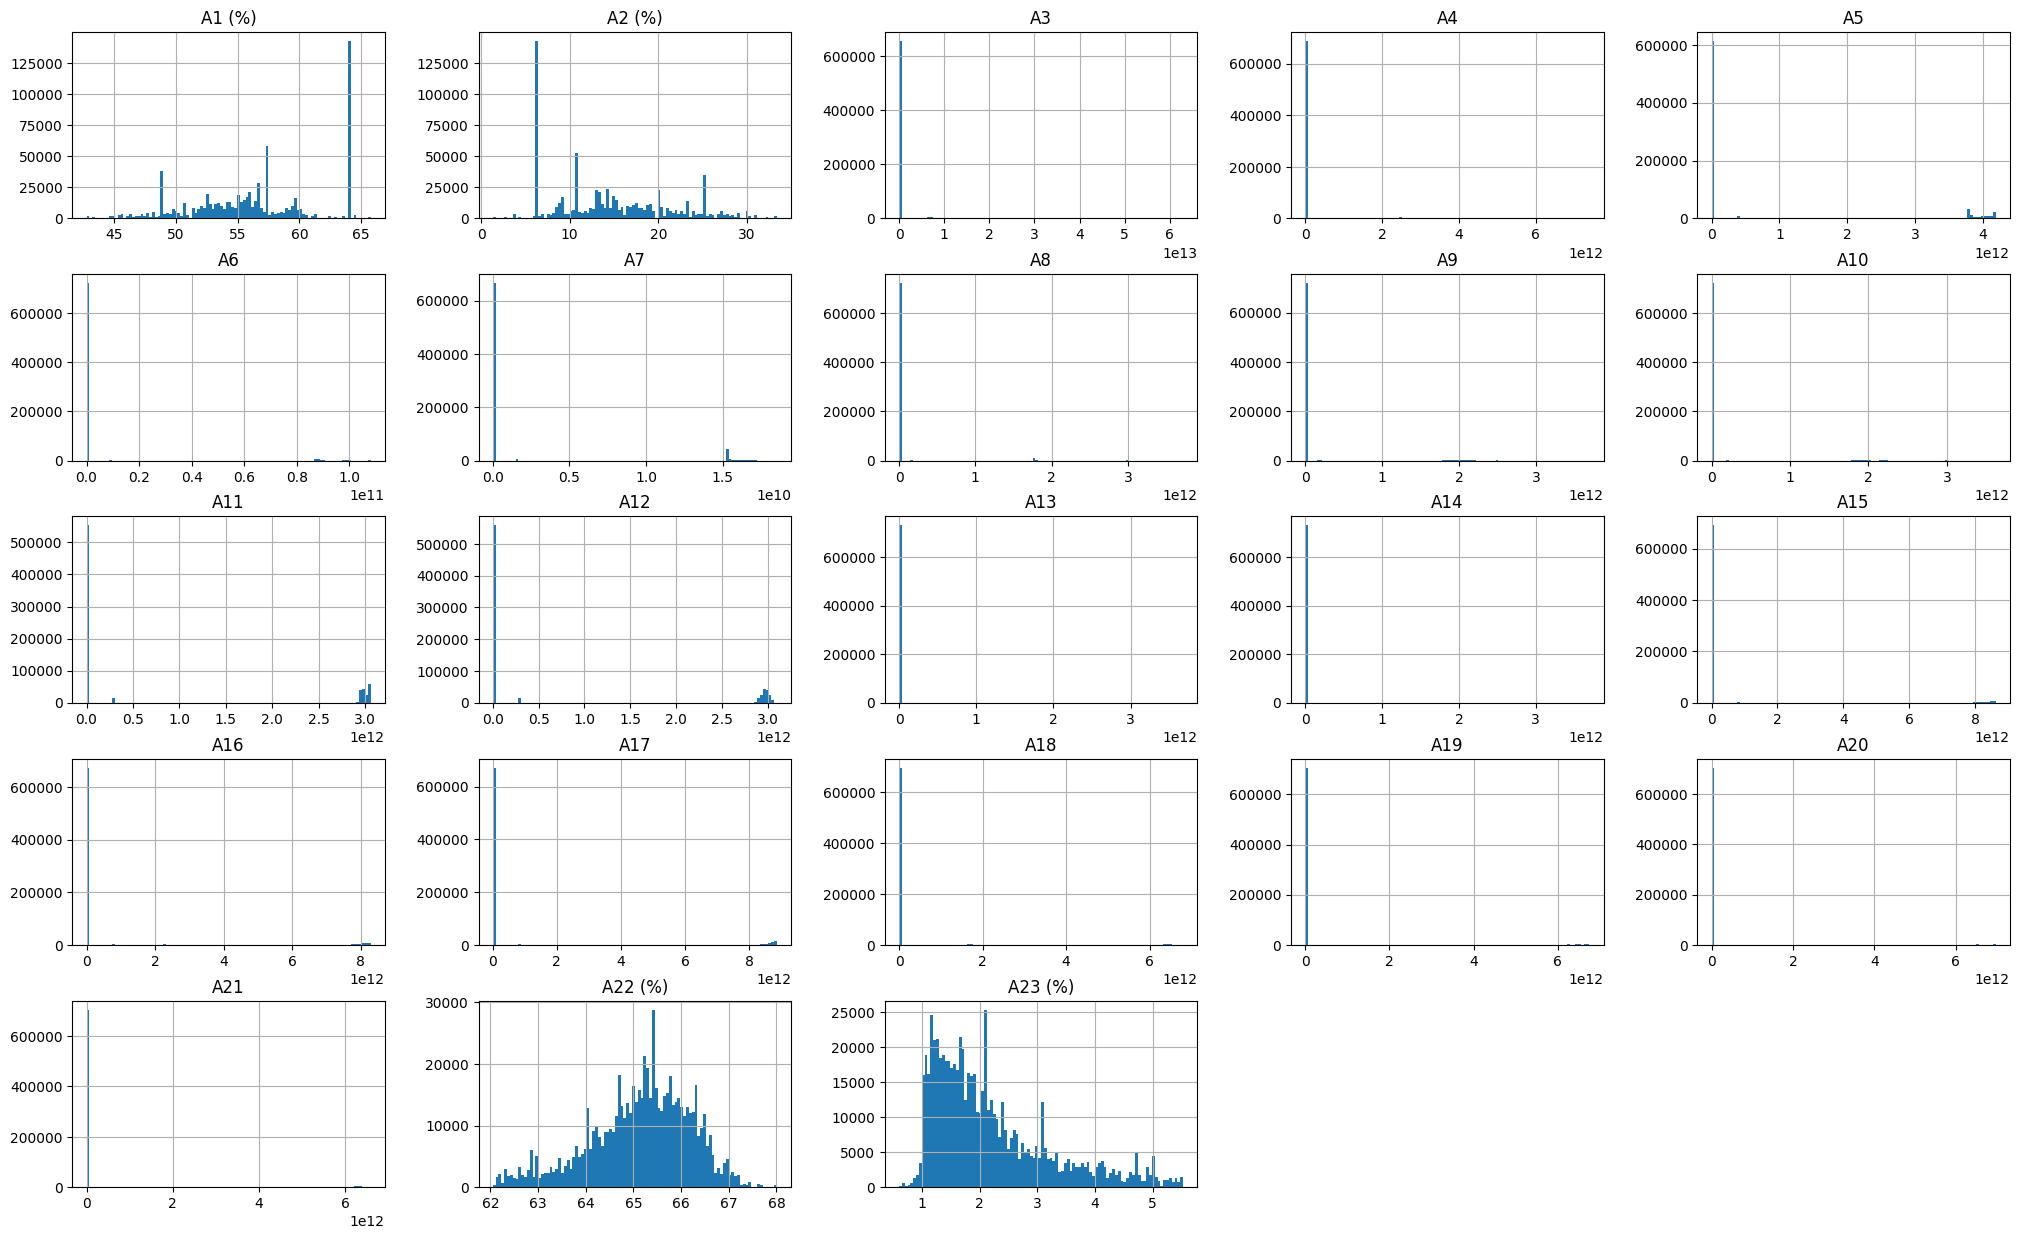

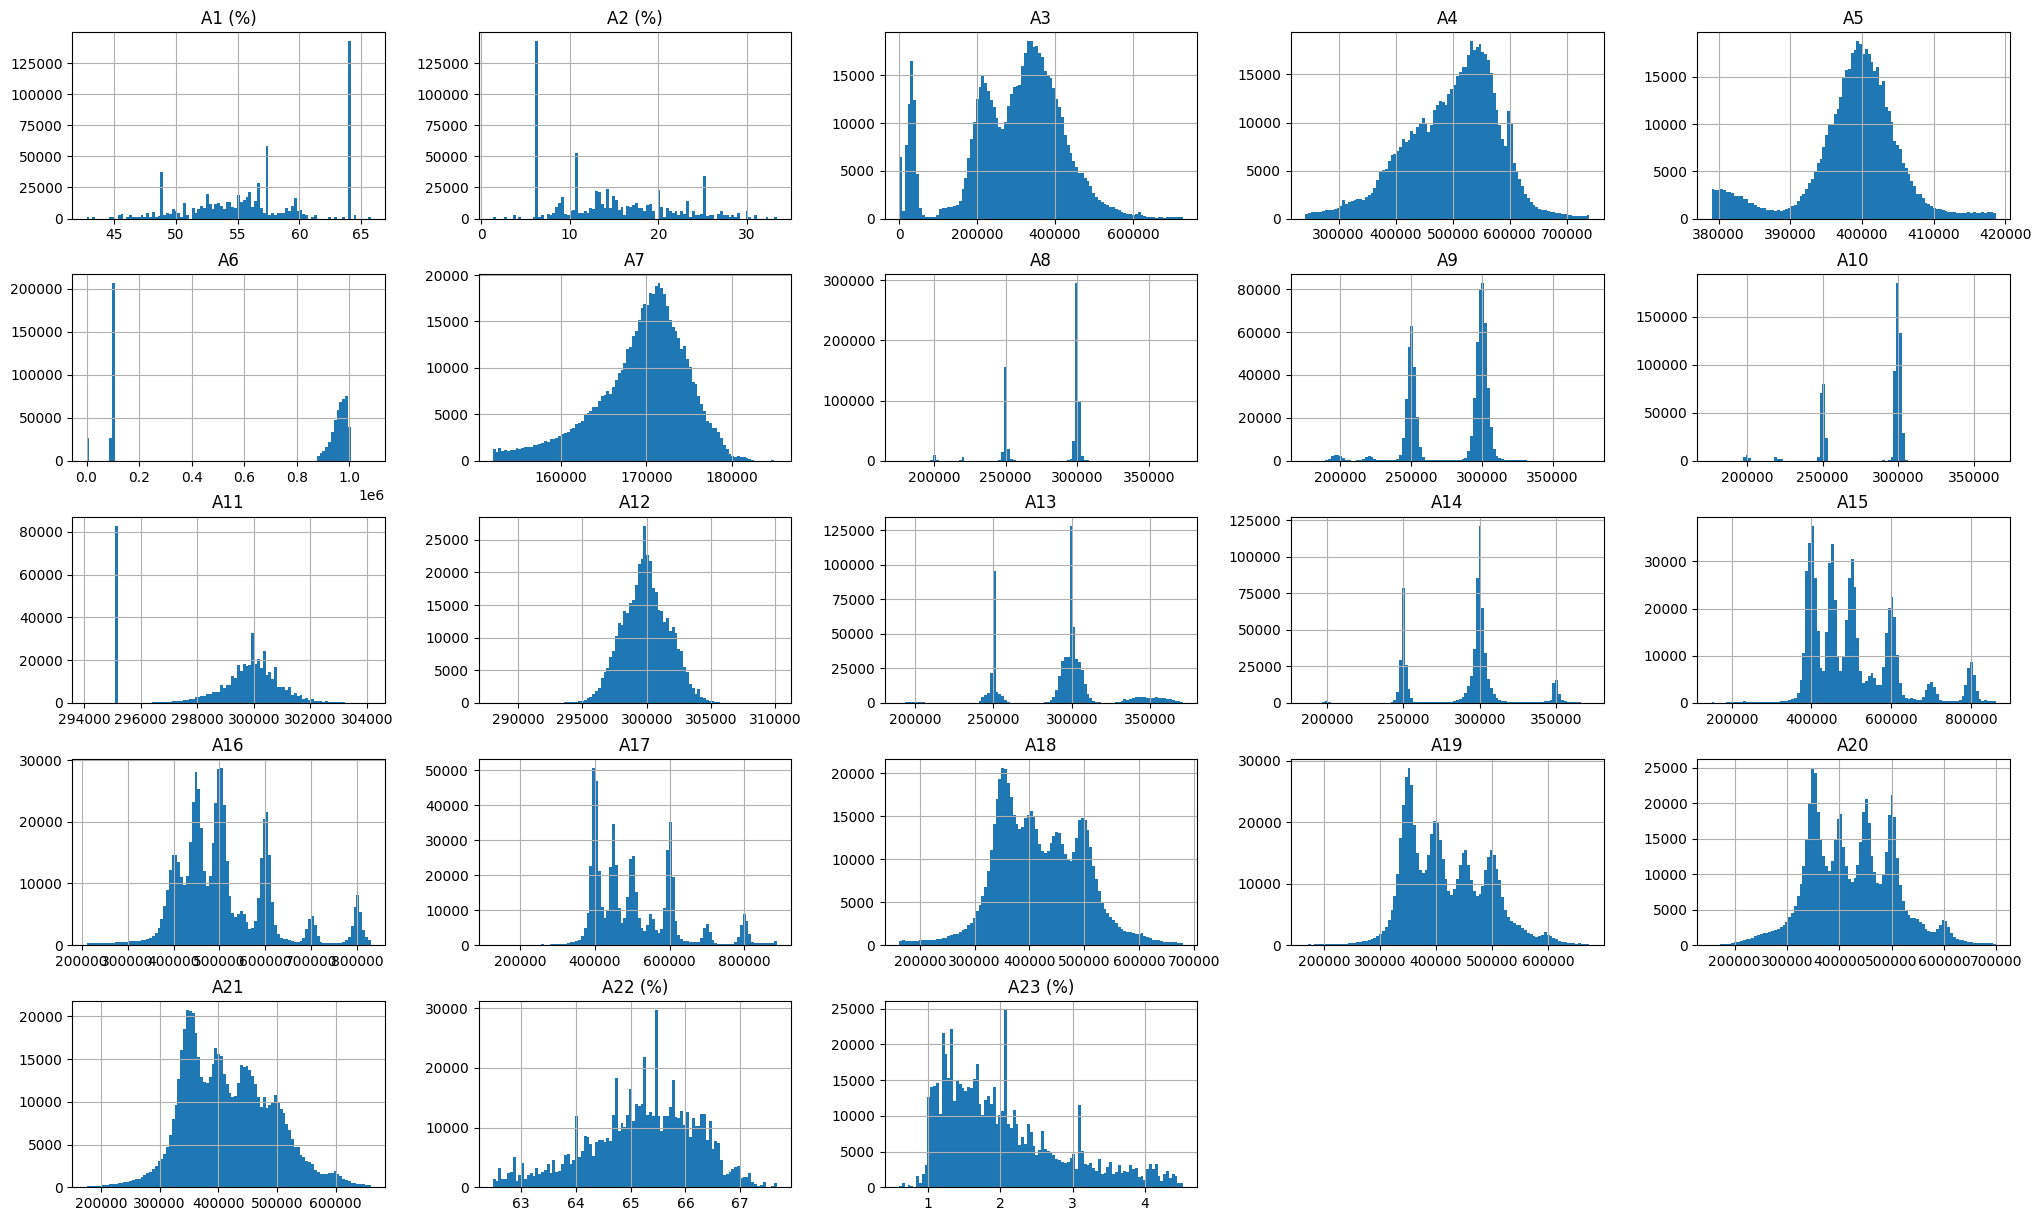

In [171]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


cat_data = df['date']  # 假设日期列名为 'date'
numeric_data = df.drop('date', axis=1)  # 删除日期列，只保留数值列
hits_feature(numeric_data)
print(numeric_data.info())
# 定义一个函数来标记异常值为 NaN
def mark_outliers_as_nan(series):
    if series.dtype in ['int64', 'float64']:  # 检查是否为数值类型的 Series
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # 将异常值设置为 NaN
        return series.mask((series < lower_bound) | (series > upper_bound))
    else:
        return series  # 如果不是数值类型的 Series，直接返回原始 Series

for column in numeric_data:
    # 应用函数到 DataFrame 的每个列，可以针对特定列多次应用
    numeric_data[column] = mark_outliers_as_nan(numeric_data[column]) #input series
numeric_data["A11"] = mark_outliers_as_nan(numeric_data["A11"]) #input series
hits_feature(numeric_data)
print(numeric_data.info())
#print(numeric_data.describe())
# 将处理后的数值列与日期列合并
clean_df = pd.concat([cat_data, numeric_data], axis=1) # concat the series with df


# 为每个数值特征单独绘制箱型图
# for column in clean_data_columns.columns:
#     if clean_data_columns[column].dtype in ['int64', 'float64']:  # 确保只处理数值类型的列
#         plt.figure(figsize=(6, 4))  # 设置图形尺寸
#         sns.boxplot(x=clean_data_columns[column])  # 绘制箱型图
#         plt.title(f'Boxplot of {column}')  # 设置标题
#         plt.show()  # 显示图形

In [172]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   A1 (%)   737453 non-null  float64
 1   A2 (%)   737453 non-null  float64
 2   A3       616934 non-null  float64
 3   A4       614098 non-null  float64
 4   A5       517908 non-null  float64
 5   A6       720327 non-null  float64
 6   A7       584489 non-null  float64
 7   A8       654997 non-null  float64
 8   A9       647799 non-null  float64
 9   A10      644830 non-null  float64
 10  A11      508984 non-null  float64
 11  A12      424984 non-null  float64
 12  A13      661813 non-null  float64
 13  A14      650653 non-null  float64
 14  A15      619688 non-null  float64
 15  A16      597538 non-null  float64
 16  A17      595132 non-null  float64
 17  A18      622939 non-null  float64
 18  A19      630252 non-null  float64
 19  A20      627031 non-null  float64
 20  A21      628587 non-null  


插值后的数据：


/var/folders/4j/j40mf_vx2dq4s6z_1q3fpd600000gn/T/ipykernel_55647/2902875716.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  clean_df.fillna(method='ffill', inplace=True)
/var/folders/4j/j40mf_vx2dq4s6z_1q3fpd600000gn/T/ipykernel_55647/2902875716.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  clean_df.fillna(method='bfill', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     737453 non-null  datetime64[ns]
 1   A1 (%)   737453 non-null  float64       
 2   A2 (%)   737453 non-null  float64       
 3   A3       737453 non-null  float64       
 4   A4       737453 non-null  float64       
 5   A5       737453 non-null  float64       
 6   A6       737453 non-null  float64       
 7   A7       737453 non-null  float64       
 8   A8       737453 non-null  float64       
 9   A9       737453 non-null  float64       
 10  A10      737453 non-null  float64       
 11  A11      737453 non-null  float64       
 12  A12      737453 non-null  float64       
 13  A13      737453 non-null  float64       
 14  A14      737453 non-null  float64       
 15  A15      737453 non-null  float64       
 16  A16      737453 non-null  float64       
 17  A17      7

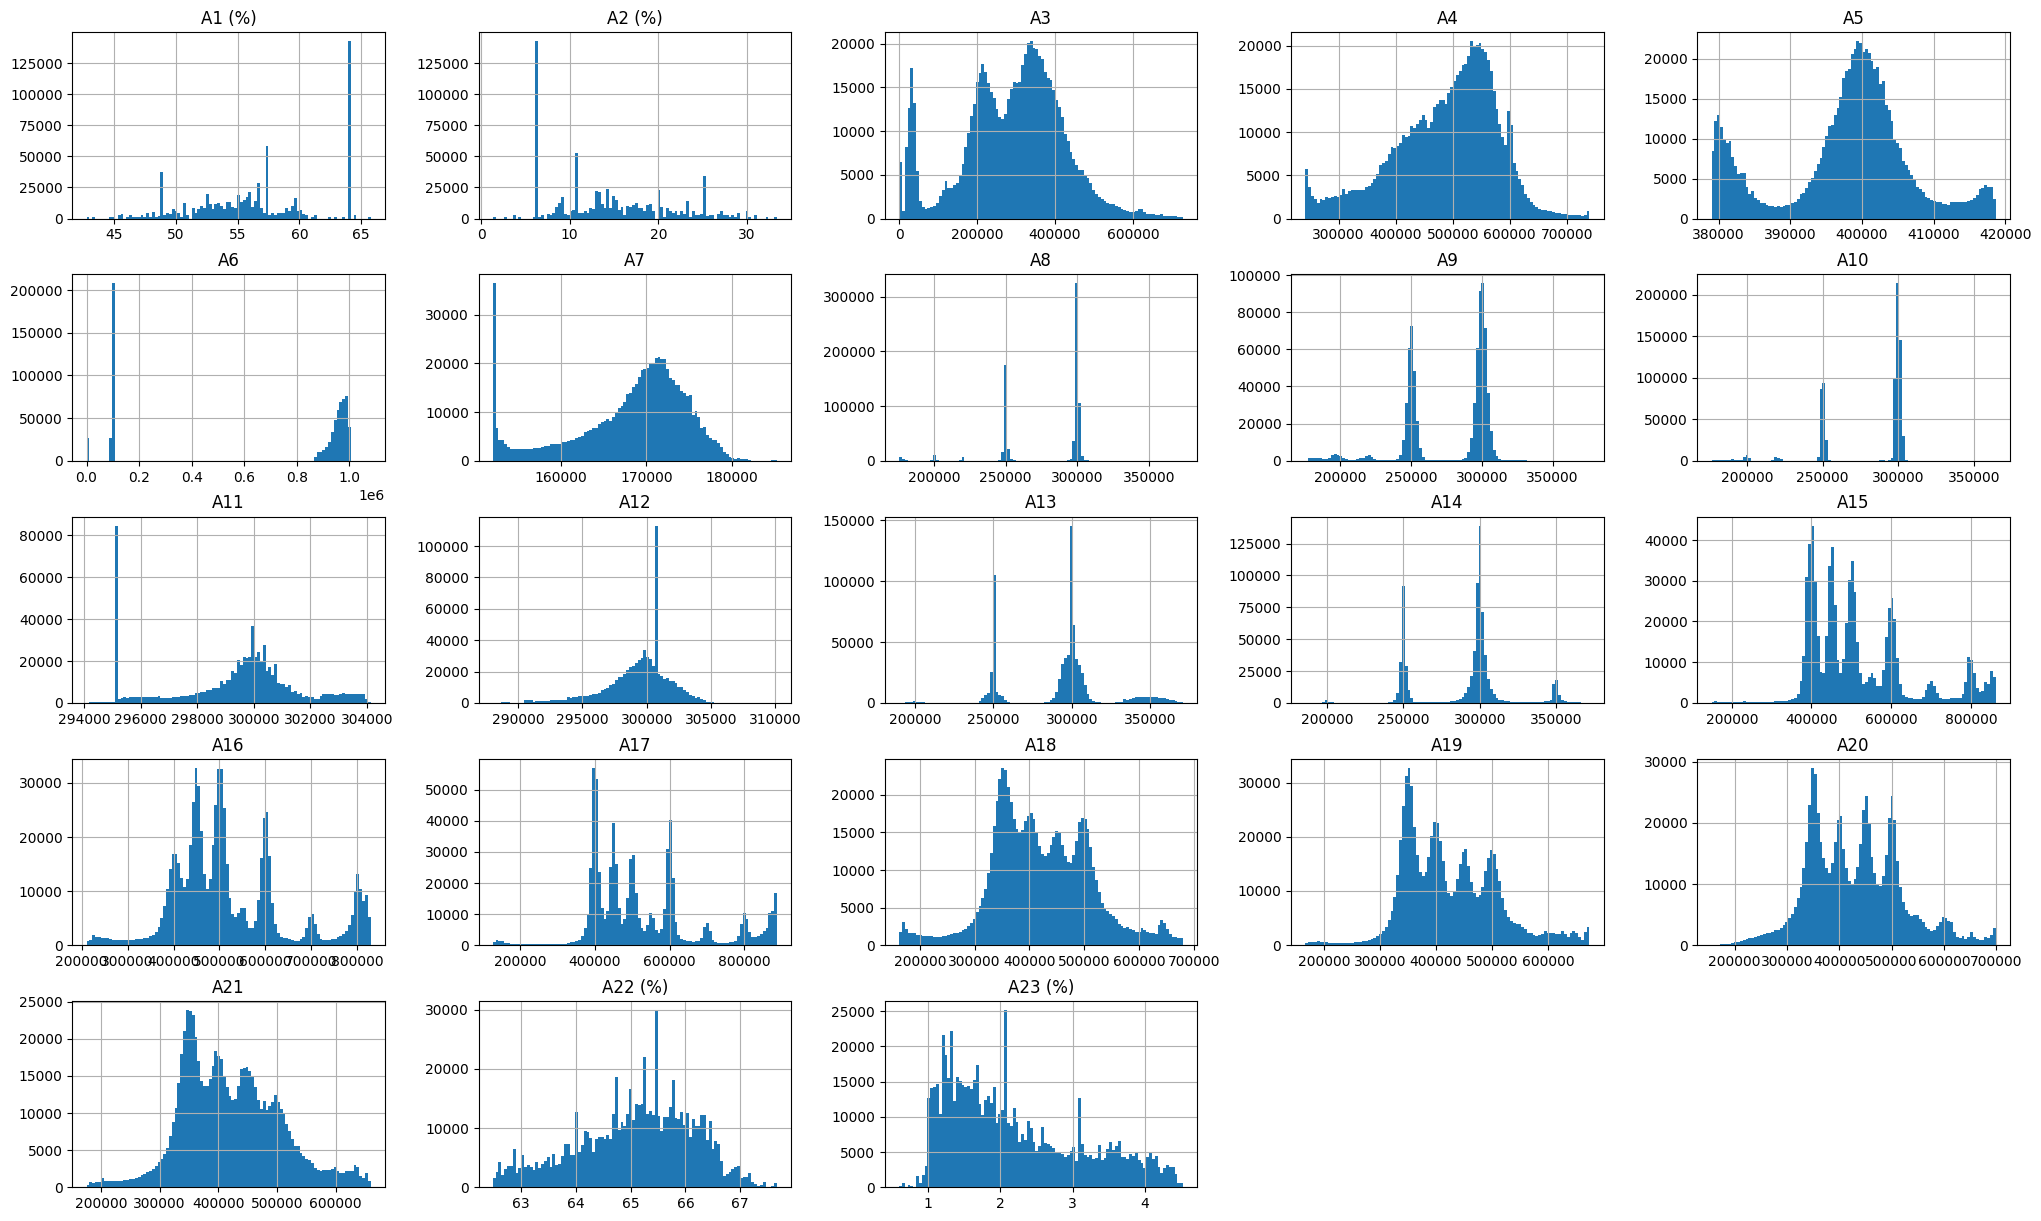

In [173]:
import pandas as pd

# 假设 df 是你的 DataFrame，且包含一个名为 'date' 的列
# 转换 'date' 列为 datetime 类型
clean_df['date'] = pd.to_datetime(clean_df['date'])
# checking
# print(clean_df['date'].head())
# print(clean_df['date'].dtype)
# print(clean_df.info())
# 应用线性插值
clean_df.interpolate(method='linear', inplace=True)

# 输出插值结果
print("\n插值后的数据：")
# 使用前向填充和后向填充
clean_df.fillna(method='ffill', inplace=True)
clean_df.fillna(method='bfill', inplace=True)
feature = clean_df.drop("date", axis=1)
hits_feature(feature)
print(clean_df.info())

In [178]:
clean_df[clean_df.isnull().any(axis=1)].head() #10615 ->47,047,513,812
clean_df.head()
clean_df.info()
clean_df["A12"].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     737453 non-null  datetime64[ns]
 1   A1 (%)   737453 non-null  float64       
 2   A2 (%)   737453 non-null  float64       
 3   A3       737453 non-null  float64       
 4   A4       737453 non-null  float64       
 5   A5       737453 non-null  float64       
 6   A6       737453 non-null  float64       
 7   A7       737453 non-null  float64       
 8   A8       737453 non-null  float64       
 9   A9       737453 non-null  float64       
 10  A10      737453 non-null  float64       
 11  A11      737453 non-null  float64       
 12  A12      737453 non-null  float64       
 13  A13      737453 non-null  float64       
 14  A14      737453 non-null  float64       
 15  A15      737453 non-null  float64       
 16  A16      737453 non-null  float64       
 17  A17      7

count    737453.000000
mean     299415.791825
std        2510.972921
min      288029.000000
25%      298279.000000
50%      299926.000000
75%      300655.000000
max      310123.000000
Name: A12, dtype: float64

In [175]:
write_dataframe_to_csv(clean_df, "op.csv")

DataFrame 已成功写入到 op.csv
